In [1]:
import matplotlib.pyplot as plt
from chainercv.datasets import voc_bbox_label_names
from chainercv.links import FasterRCNNVGG16, SSD300, SSD512, YOLOv3, YOLOv2
from chainercv.utils import read_image
from chainercv.visualizations import vis_bbox
from PIL import Image
import os

path = '/media/benamira/19793564030D4273/MCsBackup/3A/MVA/OR/recvis18_a3/bird_dataset_cropped/'
model4 = FasterRCNNVGG16(pretrained_model='voc07')
model0 = SSD300(pretrained_model='voc0712')
model2 = SSD512(pretrained_model='voc0712')
model6 = YOLOv3(pretrained_model='voc0712')
model7 = YOLOv2(pretrained_model='voc0712')

/usr/local/lib/python3.6/dist-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [2]:
def save_img(bboxes,full_path):
    img = Image.open(full_path)
    top, left , bottom, right  = bboxes[0][0]
    cropped = img.crop( ( left, top, right, bottom) )  # size: 45, 45
    try:
        cropped.save(full_path, "JPEG", quality=80, optimize=True, progressive=True)
    except IOError:
        PIL.ImageFile.MAXBLOCK = cropped.size[0] * cropped.size[1]
        cropped.save(full_path, "JPEG", quality=80, optimize=True, progressive=True)

In [17]:
def comparer_model(model, img):
    bboxes0, labels0, scores0 = model.predict([img])
    if len(bboxes0[0])>0:
        if labels0[0][0]==2:
            maximum_proba=scores0[0][0]
            return maximum_proba, bboxes0
    return(-1,-1)

In [27]:
def main_crop(path):
    for dossier, sous_dossiers, fichiers in os.walk(path):
        print (sous_dossiers)
        for num, fichier in enumerate(fichiers):
            if num%50==0:
                print(num)
            full_path = os.path.join(dossier, fichier)
            img = read_image(full_path)
            maximum0, bboxes_f0 = comparer_model(model0, img)
            maximum1, bboxes_f2 = comparer_model(model2, img)
            maximum2, bboxes_f4 = comparer_model(model4, img)
            maximum3, bboxes_f6 = comparer_model(model6, img)
            maximum4, bboxes_f7 = comparer_model(model7, img)
            
            if max([maximum0 ,maximum1, maximum2, maximum3, maximum4])<=0.9:
                continue
            if maximum0==max([maximum0 ,maximum1, maximum2, maximum3, maximum4]):
                save_img(bboxes_f0,full_path)
                continue
            if maximum1==max([maximum1, maximum2, maximum3, maximum4]):
                save_img(bboxes_f2,full_path)
                continue
            if maximum2==max([maximum2, maximum3, maximum4]):
                save_img(bboxes_f4,full_path)
                continue
            if maximum3==max([maximum3, maximum4]):
                save_img(bboxes_f6,full_path)
                continue
            if maximum4>max([maximum1, maximum2, maximum3, maximum4]):
                save_img(bboxes_f7,full_path)
                continue

In [28]:
main_crop("./bird_dataset_cropped/test_images")
main_crop("./bird_dataset_cropped/train_images")
main_crop("./bird_dataset_cropped/val_images")

['mistery_category']
[]
0
50
100
150
200
250
300
350
400
450
500
['004.Groove_billed_Ani', '009.Brewer_Blackbird', '010.Red_winged_Blackbird', '011.Rusty_Blackbird', '012.Yellow_headed_Blackbird', '013.Bobolink', '014.Indigo_Bunting', '015.Lazuli_Bunting', '016.Painted_Bunting', '019.Gray_Catbird', '020.Yellow_breasted_Chat', '021.Eastern_Towhee', '023.Brandt_Cormorant', '026.Bronzed_Cowbird', '028.Brown_Creeper', '029.American_Crow', '030.Fish_Crow', '031.Black_billed_Cuckoo', '033.Yellow_billed_Cuckoo', '034.Gray_crowned_Rosy_Finch']
[]
0
50
[]
0
50
[]
0
50
[]
0
50
[]
0
50
[]
0
50
[]
0
50
[]
0
50
[]
0
50
[]
0
50
[]
0
50
[]
0
50
[]
0
50
[]
0
50
[]
0
50
[]
0
50
[]
0
50
[]
0
50
[]
0
50
[]
0
50
['004.Groove_billed_Ani', '009.Brewer_Blackbird', '010.Red_winged_Blackbird', '011.Rusty_Blackbird', '012.Yellow_headed_Blackbird', '013.Bobolink', '014.Indigo_Bunting', '015.Lazuli_Bunting', '016.Painted_Bunting', '019.Gray_Catbird', '020.Yellow_breasted_Chat', '021.Eastern_Towhee', '023.Brandt_C

5

In [29]:
def plot(full_path,model):
    # Read an RGB image and return it in CHW format.
    img = read_image(full_path)
    bboxes, labels, scores = model.predict([img])
    print(labels, scores)
    vis_bbox(img, bboxes[0], labels[0], scores[0],
             label_names=voc_bbox_label_names)
    plt.show()

In [32]:
full_path1 = '/media/benamira/19793564030D4273/MCsBackup/3A/MVA/OR/recvis18_a3/bird_dataset/test_images/mistery_category/1b62fffcbf47a4f9e32b400edc662f1f.jpg'
full_path2 = '/media/benamira/19793564030D4273/MCsBackup/3A/MVA/OR/recvis18_a3/bird_dataset/test_images/mistery_category/0b89974eac5087159b029dc61980510a.jpg'
full_path3 = '/media/benamira/19793564030D4273/MCsBackup/3A/MVA/OR/recvis18_a3/bird_dataset/test_images/mistery_category/1d901287dd62656c8089234dbb88d732.jpg'
full_path4 = '/media/benamira/19793564030D4273/MCsBackup/3A/MVA/OR/recvis18_a3/bird_dataset/train_images/016.Painted_Bunting/Painted_Bunting_0032_16605.jpg'
full_path5 = '/media/benamira/19793564030D4273/MCsBackup/3A/MVA/OR/recvis18_a3/bird_dataset/train_images/016.Painted_Bunting/Painted_Bunting_0069_16462.jpg'
full_path6 = '/media/benamira/19793564030D4273/MCsBackup/3A/MVA/OR/recvis18_a3/bird_dataset/train_images/020.Yellow_breasted_Chat/Yellow_Breasted_Chat_0077_21986.jpg'

[array([2], dtype=int32)] [array([0.9940583], dtype=float32)]


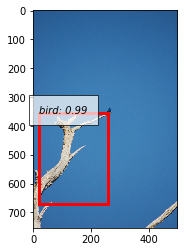

[array([2], dtype=int32)] [array([0.97298414], dtype=float32)]


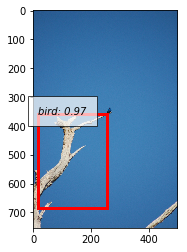

[array([], dtype=int32)] [array([], dtype=float32)]


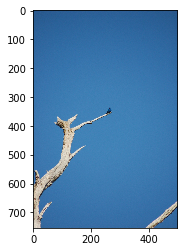

[array([], dtype=int32)] [array([], dtype=float32)]


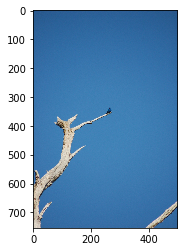

[array([], dtype=int32)] [array([], dtype=float32)]


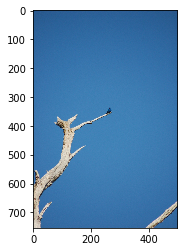

In [33]:
plot(full_path1,model0)
plot(full_path1,model2)
plot(full_path1,model4)
plot(full_path1,model6)
plot(full_path1,model7)

[array([], dtype=int32)] [array([], dtype=float32)]


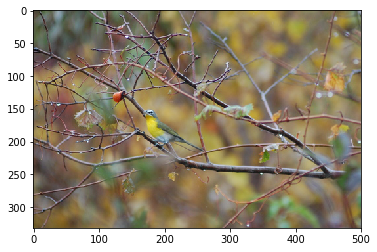

[array([], dtype=int32)] [array([], dtype=float32)]


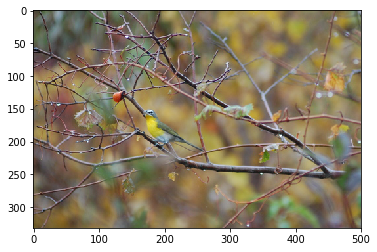

[array([2], dtype=int32)] [array([0.88854474], dtype=float32)]


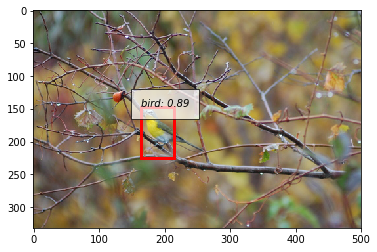

[array([], dtype=int32)] [array([], dtype=float32)]


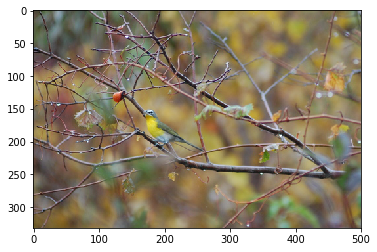

[array([], dtype=int32)] [array([], dtype=float32)]


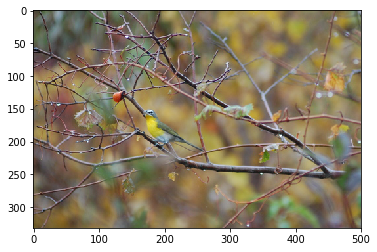

In [34]:
plot(full_path2,model0)
plot(full_path2,model2)
plot(full_path2,model4)
plot(full_path2,model6)
plot(full_path2,model7)

[array([0], dtype=int32)] [array([0.82494783], dtype=float32)]


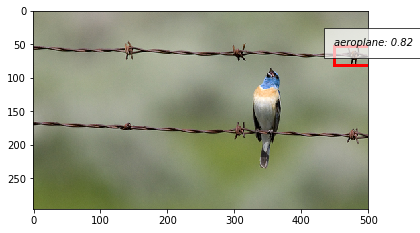

[array([0, 0], dtype=int32)] [array([0.8038461, 0.6562992], dtype=float32)]


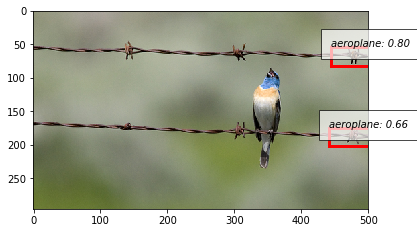

[array([0, 0, 2], dtype=int32)] [array([0.9479258 , 0.79641473, 0.996323  ], dtype=float32)]


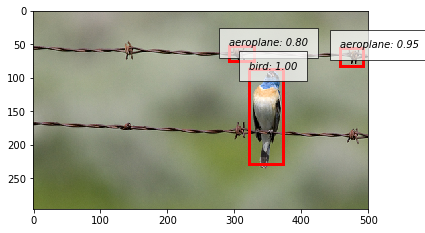

[array([2], dtype=int32)] [array([0.9982815], dtype=float32)]


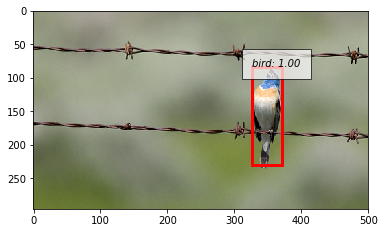

[array([2], dtype=int32)] [array([0.8075308], dtype=float32)]


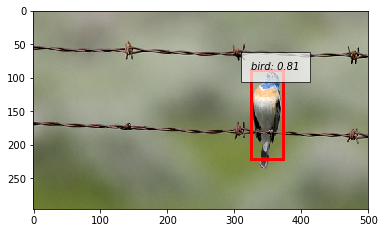

In [35]:
plot(full_path3,model0)
plot(full_path3,model2)
plot(full_path3,model4)
plot(full_path3,model6)
plot(full_path3,model7)

[array([], dtype=int32)] [array([], dtype=float32)]


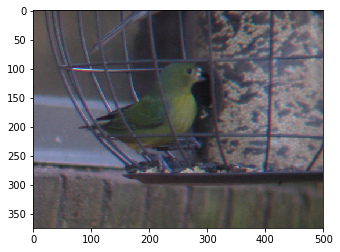

[array([2], dtype=int32)] [array([0.74952286], dtype=float32)]


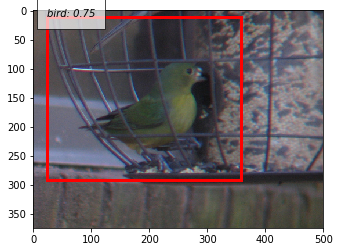

[array([2], dtype=int32)] [array([0.8447966], dtype=float32)]


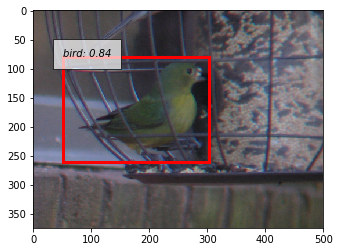

[array([2], dtype=int32)] [array([0.9975183], dtype=float32)]


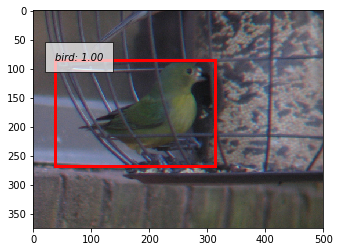

[array([2], dtype=int32)] [array([0.7955838], dtype=float32)]


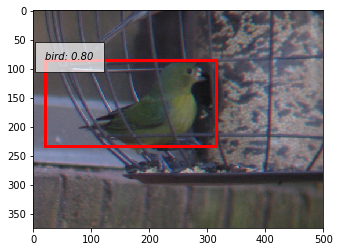

In [36]:
plot(full_path4,model0)
plot(full_path4,model2)
plot(full_path4,model4)
plot(full_path4,model6)
plot(full_path4,model7)

[array([], dtype=int32)] [array([], dtype=float32)]


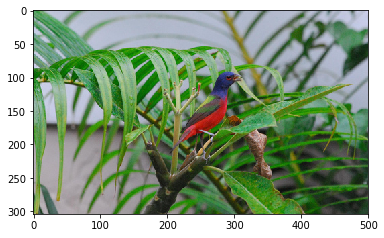

[array([2], dtype=int32)] [array([0.997478], dtype=float32)]


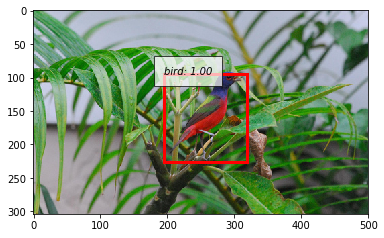

[array([2, 2], dtype=int32)] [array([0.8940714, 0.7837654], dtype=float32)]


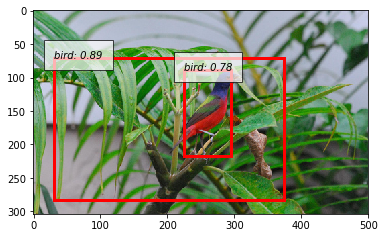

[array([2], dtype=int32)] [array([0.9703498], dtype=float32)]


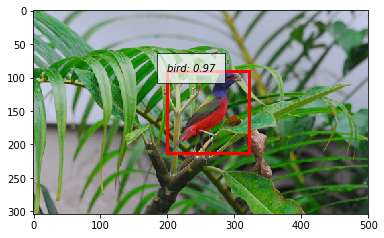

[array([2], dtype=int32)] [array([0.7102248], dtype=float32)]


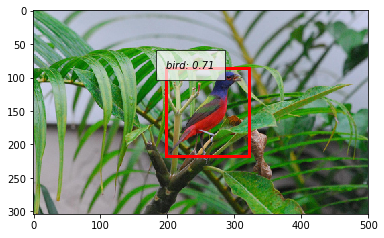

In [37]:
plot(full_path5,model0)
plot(full_path5,model2)
plot(full_path5,model4)
plot(full_path5,model6)
plot(full_path5,model7)

[array([2], dtype=int32)] [array([0.99990064], dtype=float32)]


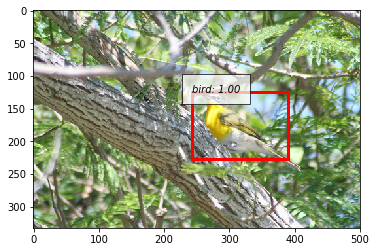

[array([2], dtype=int32)] [array([0.9999071], dtype=float32)]


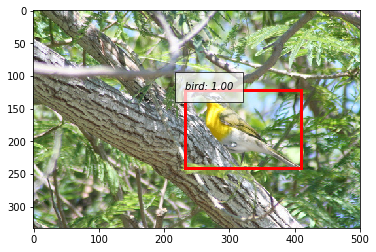

[array([2], dtype=int32)] [array([0.9372122], dtype=float32)]


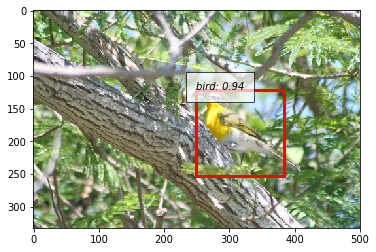

[array([2], dtype=int32)] [array([0.9967045], dtype=float32)]


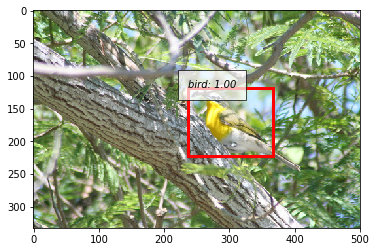

[array([2], dtype=int32)] [array([0.7121174], dtype=float32)]


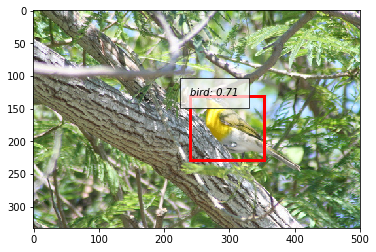

In [38]:
plot(full_path6,model0)
plot(full_path6,model2)
plot(full_path6,model4)
plot(full_path6,model6)
plot(full_path6,model7)